In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

In [ ]:
print(data.shape)
data.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [ ]:
data.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


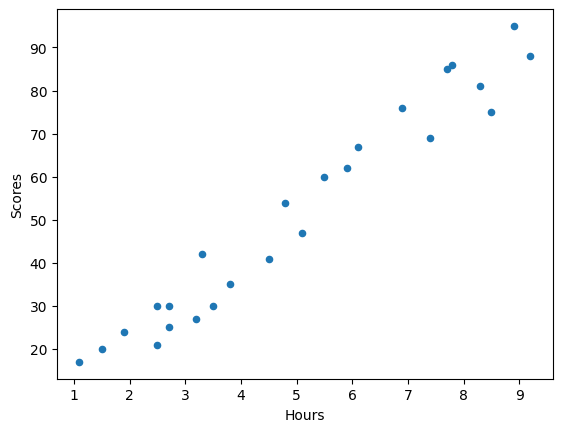

In [ ]:
data.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

In [ ]:
data.corr(method="pearson")

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

In [ ]:
data.corr(method="spearman")

Hours    Scores
Hours   1.000000  0.971891
Scores  0.971891  1.000000

In [ ]:
hours=data['Hours']
scores=data['Scores']

<ipython-input-12-a4006d7fac6c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hours)


<Axes: xlabel='Hours', ylabel='Density'>

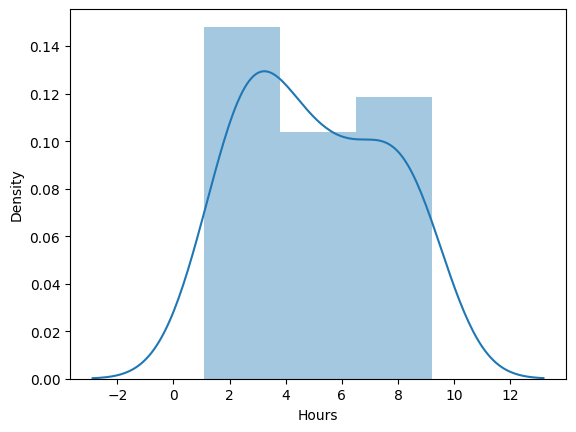

In [ ]:
sns.distplot(hours)

<ipython-input-13-cd71314d34aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores)


<Axes: xlabel='Scores', ylabel='Density'>

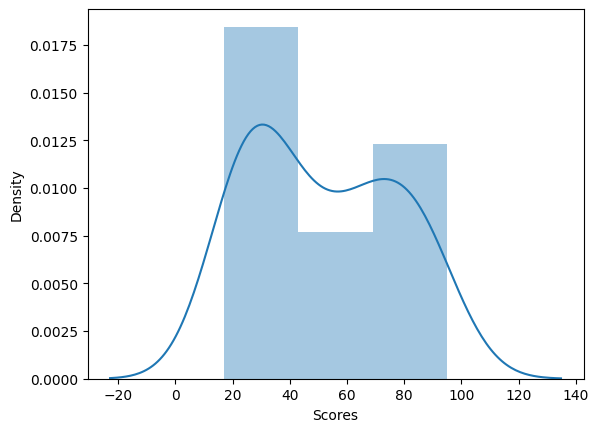

In [ ]:
sns.distplot(scores)

LINEAR REGRESSION

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:,:1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

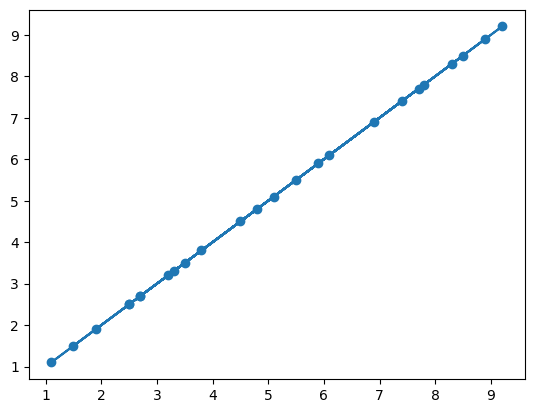

In [ ]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [ ]:
y_pred=reg.predict(x_test)

<ipython-input-23-956bf8018746>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(y_test-y_pred))


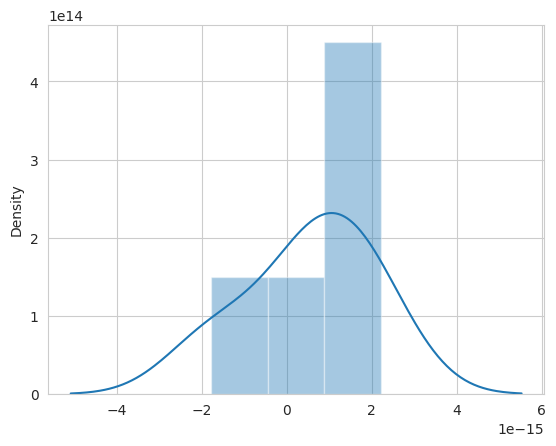

In [ ]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [ ]:
h = 9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [[9.25]] % in exam.


Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 1.2434497875801752e-15
R2 Score: 1.0
